In [1]:
# Medical Insurance Prediction - Linear Regression Model

In [4]:
#age: age of primary beneficiary
#sex: insurance contractor gender, female, male
#bmi: Body mass index, providing an understanding of body, weights that are relatively high or low 
#objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
#children: Number of children covered by health insurance / Number of dependents
#smoker: Smoking
#region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
#charges: Individual medical costs billed by health insurance


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [12]:
df=pd.read_csv(r'C:\Users\david\Desktop\Curso ML\Pandas\insurance.csv')

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [16]:
df.shape

(1338, 7)

In [18]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\david\AppData\Local\Temp\ipykernel_15236\4107779019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0.5, 1.0, 'Age distribution')

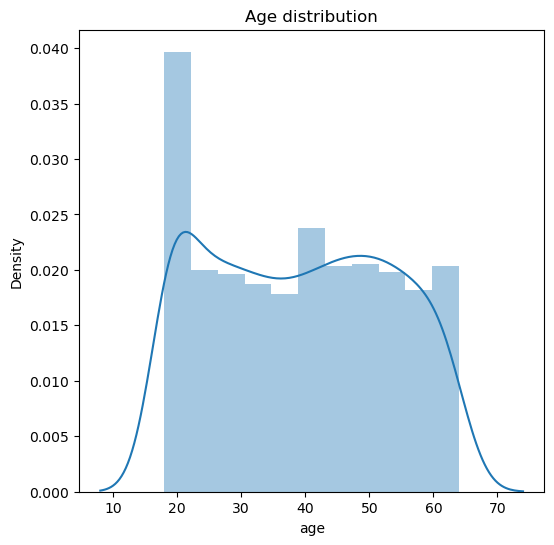

In [32]:
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age distribution')

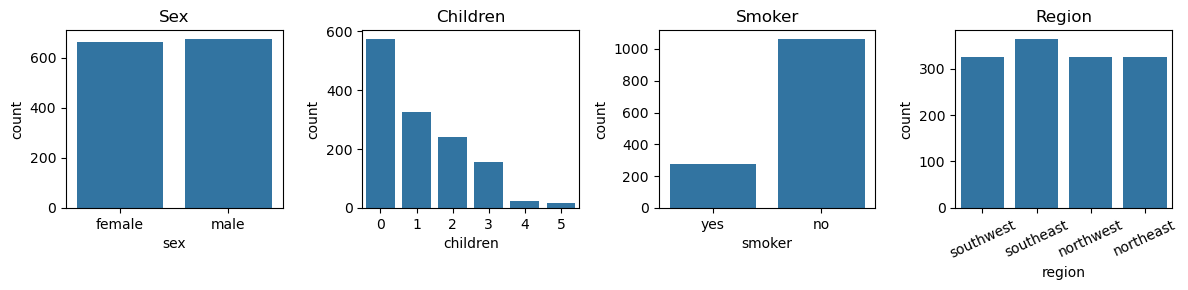

In [76]:
fig,ax=plt.subplots(1,4,figsize=(12,3))

sns.countplot(x='sex',data=df,ax=ax[0])
sns.countplot(x='children',data=df,ax=ax[1])
sns.countplot(x='smoker',data=df,ax=ax[2])
sns.countplot(x='region',data=df,ax=ax[3])
ax[0].set_title('Sex')
ax[1].set_title('Children')
ax[2].set_title('Smoker')
ax[3].set_title('Region')
ax[3].tick_params(axis='x',rotation=25)
plt.tight_layout()

In [82]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\david\AppData\Local\Temp\ipykernel_15236\240250513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


Text(0.5, 1.0, 'BMI distribution')

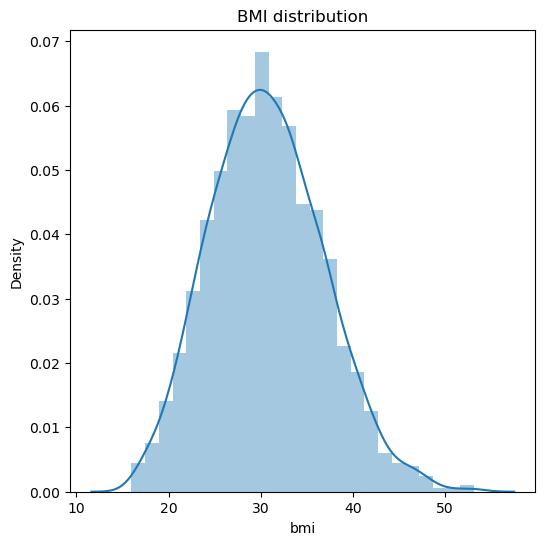

In [80]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI distribution')

In [ ]:
# Normal BMI range --> 18.5 to 24.9

In [84]:
# Encoding of categorical features (sex,smoker,region)

df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


C:\Users\david\AppData\Local\Temp\ipykernel_15236\2107248524.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}},inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_15236\2107248524.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}},inplace=True)
C:\Users\david\AppData\Local\Temp\ipykernel_15236\2107248524.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, exp

In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [88]:
# dividimos datos
X=df.drop(columns='charges', axis=1)
y=df['charges']

In [90]:
print(X.shape,y.shape)

(1338, 6) (1338,)


In [92]:
# realizamos split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [97]:
# Entrenamos el modelo
model=LinearRegression()

In [99]:
# entrenamos el modelo
model.fit(X_train,y_train)

LinearRegression()

In [101]:
# evaluación del modelo
X_train_pred=model.predict(X_train)
r2_train=metrics.r2_score(y_train,X_train_pred)
print(r2_train)

0.751505643411174


In [105]:
X_test_pred=model.predict(X_test)
r2_test=metrics.r2_score(y_test,X_test_pred)
print(r2_test)

0.7447273869684077


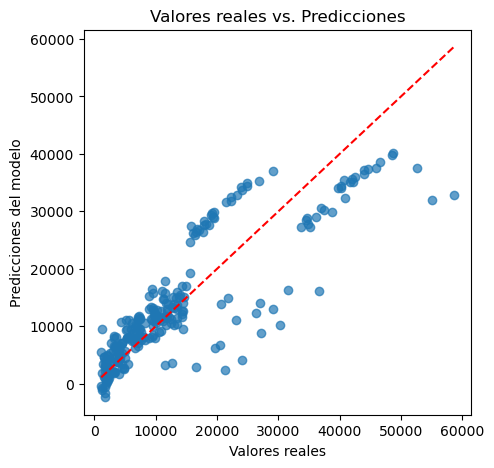

In [113]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, X_test_pred, alpha=0.7)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones del modelo")
plt.title("Valores reales vs. Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Línea ideal
plt.show()

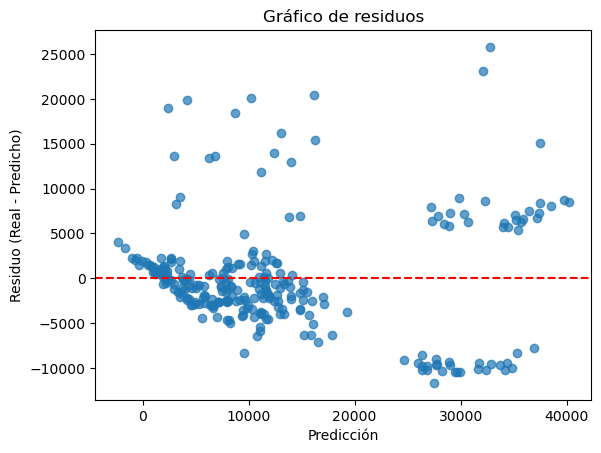

In [121]:
# grafico de residuos
residuos = y_test - X_test_pred
plt.scatter(X_test_pred, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicción")
plt.ylabel("Residuo (Real - Predicho)")
plt.title("Gráfico de residuos")
plt.show()